In [130]:
import torch
import torch.nn as nn

In [124]:
in_dim=784
encoded_dim=30
import torch.nn.functional as F

X=[]
Y=[]
def saveencoded(self, input, output):
    global X
    X+=output.detach().numpy().tolist()
class autoencoder(nn.Module):
    def __init__(self,in_dim,encoded_dim):
        super(autoencoder, self).__init__()
        self.fc1 = nn.Linear(in_dim, in_dim-300)
        
        self.fc4 = nn.Linear(in_dim-500, encoded_dim)
        self.fc5=nn.Linear(encoded_dim,encoded_dim+250)
        self.fc6=nn.Linear(encoded_dim+250,in_dim)
    def forward(self, x):
        x=x.reshape(-1,784)
        x = F.relu(self.fc1(x))
#         x=F.relu(self.fc3(x))
        x=self.fc4(x)
        x=F.relu(self.fc5(x))
        x=self.fc6(x)
        x=x.reshape(-1,1,28,28)
        return x
net=autoencoder(in_dim,encoded_dim)   

In [128]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.00001, momentum=.9)
scheduler=torch.optim.lr_scheduler.StepLR(optimizer, 1, gamma=0.1)

In [59]:
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=True, num_workers=1)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=1)


In [129]:



    

for epoch in range(6):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        
        x,y=data
        
        scheduler.step()
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        xprime = net(x)
        loss = criterion(xprime, x)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.025
[1,  4000] loss: 0.025
[1,  6000] loss: 0.025
[1,  8000] loss: 0.025
[1, 10000] loss: 0.025
[1, 12000] loss: 0.025
[1, 14000] loss: 0.025
[1, 16000] loss: 0.025
[1, 18000] loss: 0.025
[1, 20000] loss: 0.025
[1, 22000] loss: 0.025
[1, 24000] loss: 0.025
[1, 26000] loss: 0.025
[1, 28000] loss: 0.025
[1, 30000] loss: 0.025
[1, 32000] loss: 0.025
[1, 34000] loss: 0.025
[1, 36000] loss: 0.025
[1, 38000] loss: 0.025
[1, 40000] loss: 0.025
[1, 42000] loss: 0.025
[1, 44000] loss: 0.025
[1, 46000] loss: 0.025
[1, 48000] loss: 0.025
[1, 50000] loss: 0.025
[1, 52000] loss: 0.025
[1, 54000] loss: 0.025
[1, 56000] loss: 0.025
[1, 58000] loss: 0.025
[1, 60000] loss: 0.025
[2,  2000] loss: 0.025
[2,  4000] loss: 0.025
[2,  6000] loss: 0.025
[2,  8000] loss: 0.025
[2, 10000] loss: 0.025
[2, 12000] loss: 0.025
[2, 14000] loss: 0.025
[2, 16000] loss: 0.025
[2, 18000] loss: 0.025
[2, 20000] loss: 0.025
[2, 22000] loss: 0.025
[2, 24000] loss: 0.025
[2, 26000] loss: 0.025
[2, 28000] 

Process Process-68:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 106, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 187, in default_collate
    return [default_collate(samples) for samples in transposed]
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 187, in <listcomp>
    return [default_collate(samples) for samples in transposed]
  File "/Library

KeyboardInterrupt: 

In [37]:
torch.save(net,'mnist025loss')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type autoencoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [125]:
net=torch.load('mnist025loss')

In [65]:
#store encoded values
X=[]
Y=[]
net.fc4.register_forward_hook(saveencoded)

for x,y in trainloader:
    Y+=y.numpy().tolist()
    decoded=net(x)

In [12]:
%matplotlib inline


tensor(30.7117, grad_fn=<SumBackward0>)
[2]


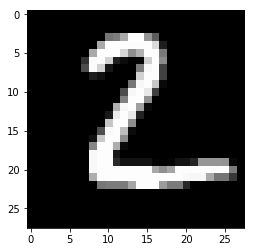

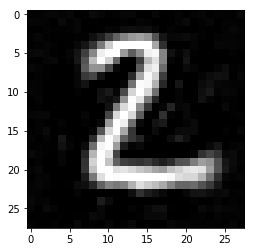

Process Process-64:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/queues.py", line 104, in get
    if not self._poll(timeout):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/connection.py", line 257, in poll
    return self._poll(timeout)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/connection.py", line 414, in _poll
    r = wa

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(testloader)
dataiter.next()
# dataiter.next()
image, label = dataiter.next()
print(criterion(image,net(image)))
print(label.numpy().tolist())
# show images
imshow(torchvision.utils.make_grid(image))
plt.show()
imshow(torchvision.utils.make_grid(net(image).detach()))
plt.show()

In [5]:
# X=np.array(X)
# X.reshape(50002,3*32*15)
# Y=np.array(Y).reshape(50000,1)
# print(X.shape)
# print(Y.shape)
# print(x.shape)

ValueError: cannot reshape array of size 0 into shape (50002,1440)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
#X= encoded cifar pics
#y=labels



neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X, Y)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [71]:
X=[]
Y=[]

for x,y in testloader:
    Y+=y.numpy().tolist()
    decoded=net(x)

In [72]:
# X=np.array(X)
# X=X.reshape(10000,3*32*15)
# Y=np.array(Y).reshape(10000,1)
# print(X.shape)
# print(Y.shape)
# #print(x.shape)

In [ ]:
num_correct=0
total_num=0
X=np.array(X)
Y=np.array(Y)
for i in range(10000):
    x=X[i]
    y=Y[i]
    
    y_pred=neigh.predict(x.reshape(1,-1))
    if y_pred==y:
        num_correct+=1
    if i%2000==0:
        print(num_correct,i)
   
    total_num+=1


In [ ]:
print("accuracy: "+str(float(num_correct)/total_num))